In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb

In [16]:
train_data = pd.read_csv('./happiness_train_complete.csv',parse_dates=["survey_time"],encoding='latin-1')
test_data = pd.read_csv('./happiness_test_complete.csv',parse_dates=["survey_time"],encoding='latin-1')

In [17]:
train_data.head

<bound method NDFrame.head of         id  happiness  survey_type  province  city  county  \
0        1          4            1        12    32      59   
1        2          4            2        18    52      85   
2        3          4            2        29    83     126   
3        4          5            2        10    28      51   
4        5          4            1         7    18      36   
...    ...        ...          ...       ...   ...     ...   
7995  7996          2            2        29    82     124   
7996  7997          3            1        12    32      61   
7997  7998          4            1        16    46      78   
7998  7999          3            1         1     1       8   
7999  8000          4            1         1     1       3   

             survey_time  gender  birth  nationality  ...  \
0    2015-08-04 14:18:00       1   1959            1  ...   
1    2015-07-21 15:04:00       1   1992            1  ...   
2    2015-07-21 13:24:00       2   1967   

In [18]:
missing = train_data.isnull().sum()

In [19]:
percent_tmp = ['id']

In [20]:
for name in missing.index:
    if missing[name] >= 1000:
        percent_tmp.append(name)

In [21]:
data_extract = [col for col in train_data.columns if col not in percent_tmp]
train_data_temp = train_data[data_extract]
data_extract.remove('happiness')
test_data_temp = test_data[data_extract]

In [22]:
train_data_temp = train_data_temp.fillna(0)
test_data_temp = test_data_temp.fillna(0)

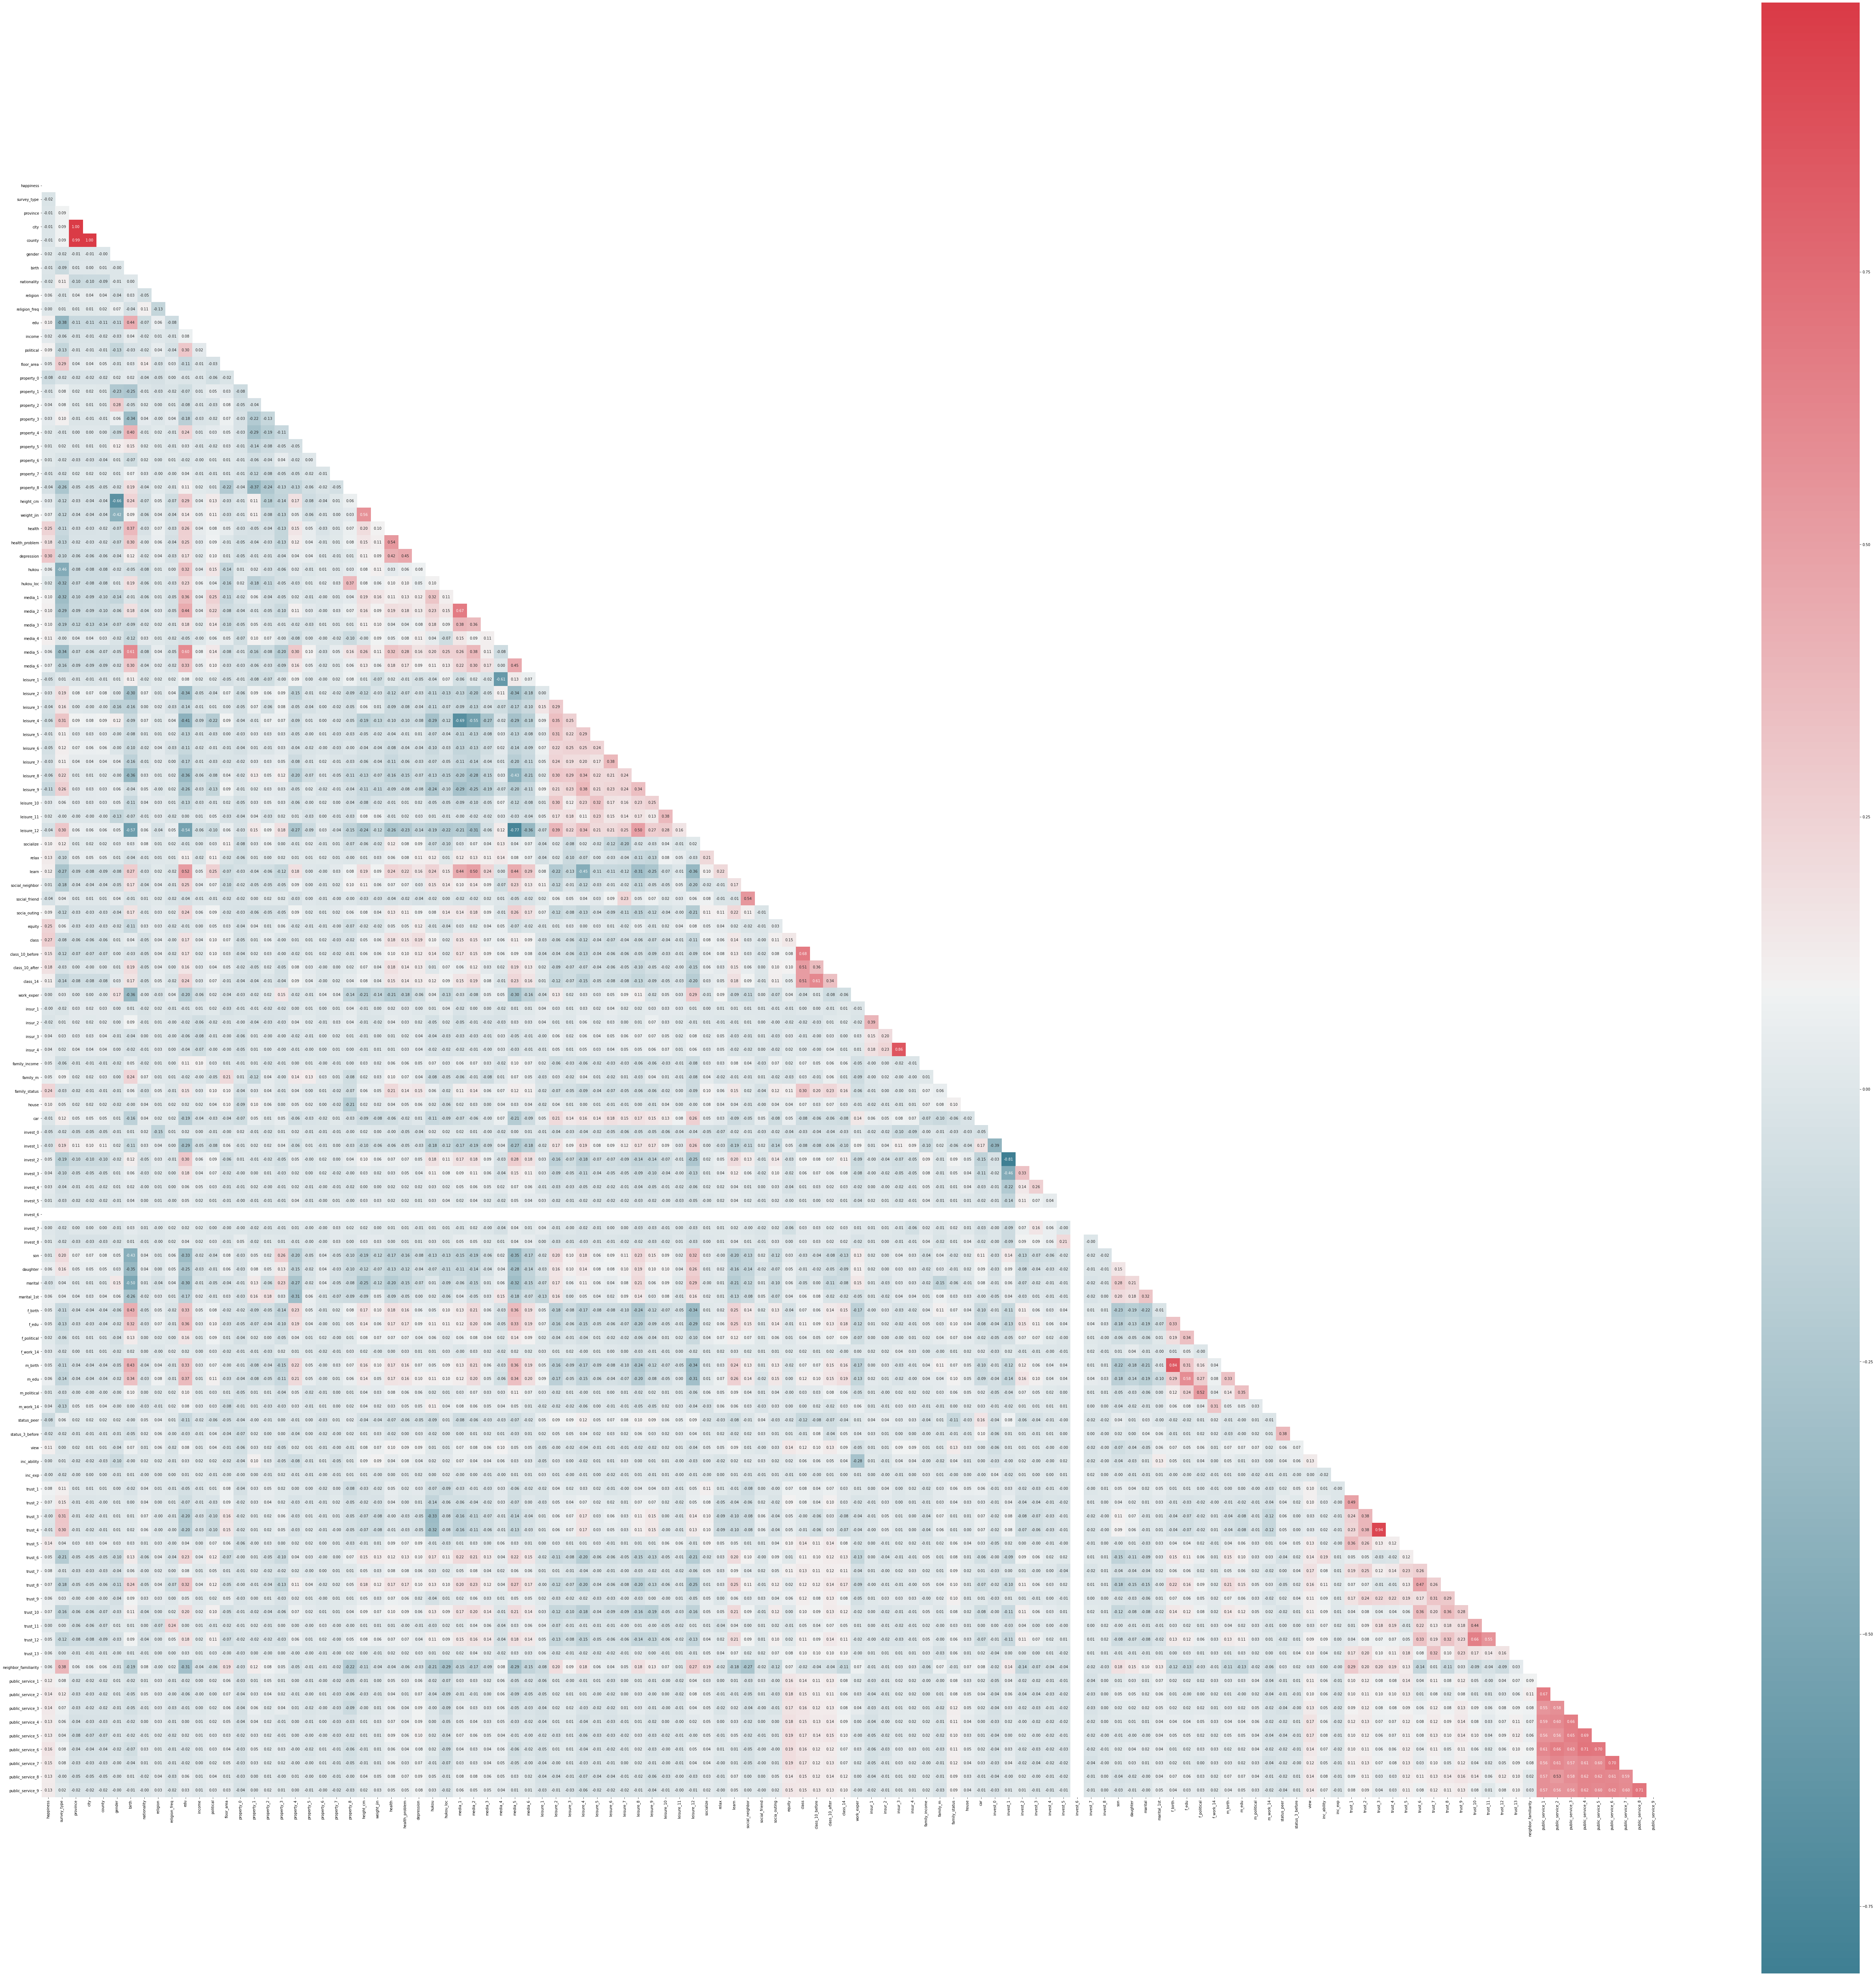

In [23]:
mcor = train_data_temp[train_data_temp.columns].corr()
plt.figure(figsize = (100,100))
mask = np.zeros_like(mcor)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(mcor,mask = mask,cmap = cmap,annot = True, square = True,fmt = '0.2f')
plt.show()

In [24]:
extract_columns = ['income','health','depression','equity','class','family_status']
X_data = train_data_temp[extract_columns]
Y_data = train_data['happiness']
X_test = test_data_temp[extract_columns]

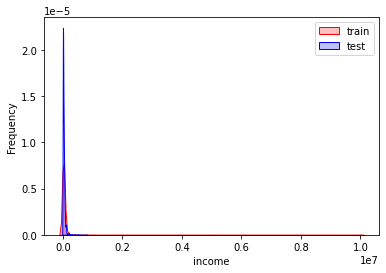

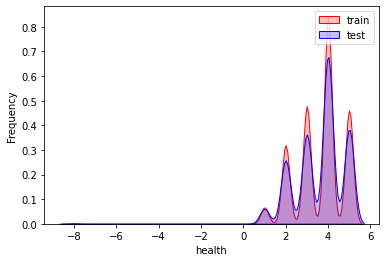

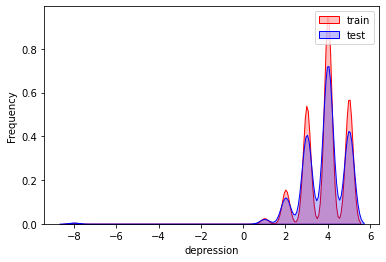

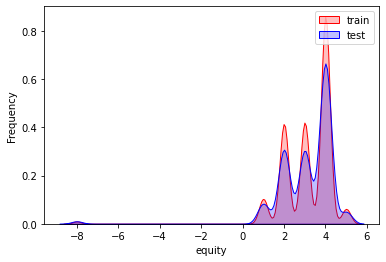

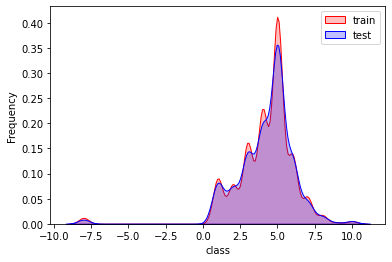

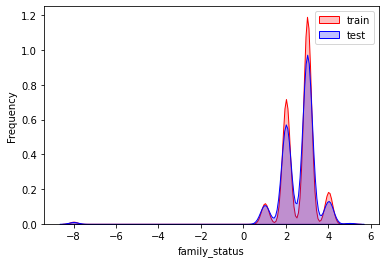

In [25]:
#plt.figure(figsize = (10*35,10*4))
#i = 1
for col in X_data.columns:
 #   ax = plt.subplot(35,4,i)
    ax = sns.kdeplot(X_data[col],color = "Red",shade = True)
    ax = sns.kdeplot(X_test[col],color = "Blue",shade = True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(["train","test"])
  #  i+=1
    plt.show()
    

In [26]:
gbm = lgb.LGBMClassifier(objective = 'regression',num_leaves=31,learning_rate = 0.05,n_estimators=20)
gbm.fit(X_data,Y_data)

LGBMClassifier(learning_rate=0.05, n_estimators=20, objective='regression')

In [27]:
realy = gbm.predict(X_test)
realy

array([4, 3, 4, ..., 4, 4, 5], dtype=int64)

In [28]:
gbm.score(X_data,Y_data)

0.6275

In [29]:
realy = pd.DataFrame(realy)
realy

,0
8001,4
8002,4
8003,4
8004,4
8005,4
...,...
10964,5
10965,4
10966,4
10967,4


In [30]:
realy.index = list(range(8001,10969))

In [31]:
realy

,0
8001,4
8002,4
8003,4
8004,4
8005,4
...,...
10964,5
10965,4
10966,4
10967,4


In [34]:
realy.to_csv('submit_corr_LGBM.csv',header = 'happiness')